# Análisis de datos exploratorios de Valorant Esports

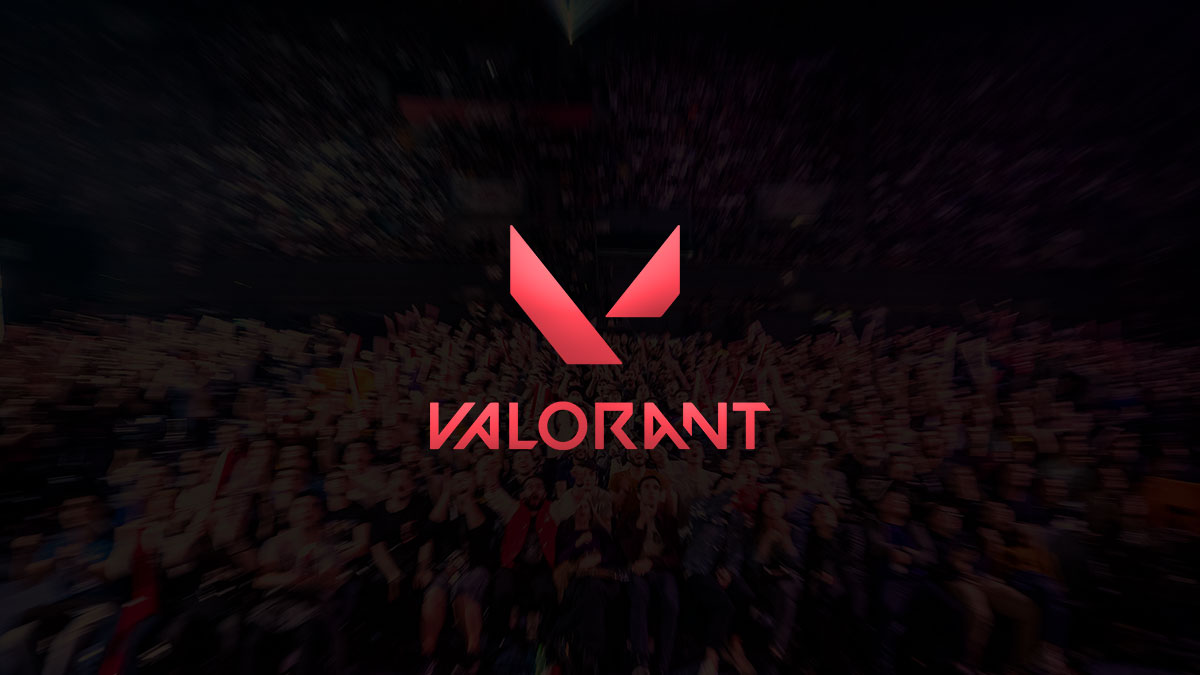

## Pasos a seguir
1. Lectura de datos
2. Procesamiento de datos
3. Análisis de datos
4. Visualización de datos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## 1. Lectura de los datos

In [2]:
players=pd.read_csv('../input/valorant-esports-top-earnings/Players.csv')
players.head()

,Rank,Player,Gold,Silver,Bronze,S Tier,Earnings
0,1,zombs,13,5,1,1,"$113,550"
1,2,ShahZaM,13,4,1,1,"$113,450"
2,3,dapr,14,3,1,1,"$112,870"
3,4,SicK,12,3,1,1,"$112,650"
4,5,cNed,12,4,2,1,"$107,735"


In [3]:
teams=pd.read_csv('../input/valorant-esports-top-earnings/Teams.csv')
teams.head()

,Rank,Team,Gold,Silver,Bronze,S Tier,Earnings
0,1,Sentinels,12,3,1,1,"$561,500"
1,2,Acend,5,1,1,1,"$498,859"
2,3,Gambit Esports,8,3,0,1,"$495,638"
3,4,Team Liquid,4,2,2,0,"$295,374"
4,5,G2 Esports,7,2,1,0,"$257,925"


## 2. Procesamiento de los datos

In [4]:
players.isnull().sum()

Rank        0
Player      0
Gold        0
Silver      0
Bronze      0
S Tier      0
Earnings    0
dtype: int64

In [5]:
teams.isnull().sum()

Rank        0
Team        0
Gold        0
Silver      0
Bronze      0
S Tier      0
Earnings    0
dtype: int64

In [6]:
teams.dtypes

Rank         int64
Team        object
Gold         int64
Silver       int64
Bronze       int64
S Tier       int64
Earnings    object
dtype: object

In [7]:
players.dtypes

Rank         int64
Player      object
Gold         int64
Silver       int64
Bronze       int64
S Tier       int64
Earnings    object
dtype: object

In [8]:
players.duplicated().sum()

0

In [9]:
teams.duplicated().sum()

0

**En ambos conjuntos de datos no hay valores nulos ni duplicados y tampoco errores en los tipos de datos**

**Solo necesitamos eliminar el símbolo del dólar y cambiar el tipo de datos de ganancias a Int64**

In [10]:
players['Earnings'] = players['Earnings'].str.replace('$','').str.replace(',','')
teams['Earnings'] = teams['Earnings'].str.replace('$','').str.replace(',','')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [11]:
players['Earnings'] = pd.to_numeric(players['Earnings'])
teams['Earnings'] = pd.to_numeric(teams['Earnings'])

In [12]:
teams.dtypes

Rank         int64
Team        object
Gold         int64
Silver       int64
Bronze       int64
S Tier       int64
Earnings     int64
dtype: object

In [13]:
players.dtypes

Rank         int64
Player      object
Gold         int64
Silver       int64
Bronze       int64
S Tier       int64
Earnings     int64
dtype: object

### Ahora el procesamiento de datos está hecho y los datos son confiables y consistentes

## 3. Análisis de los datos

In [14]:
players.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Rank,500.0,NaN,NaN,NaN,250.424,144.452002,1.0,125.75,250.5,375.25,500.0
Player,500,499,k1Ng,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gold,500.0,NaN,NaN,NaN,6.912,4.755364,0.0,3.0,6.0,9.0,26.0
Silver,500.0,NaN,NaN,NaN,4.054,2.576113,0.0,2.0,4.0,6.0,13.0
Bronze,500.0,NaN,NaN,NaN,1.666,1.461066,0.0,1.0,1.0,2.0,8.0
S Tier,500.0,NaN,NaN,NaN,0.03,0.170758,0.0,0.0,0.0,0.0,1.0
Earnings,500.0,NaN,NaN,NaN,17646.662,19277.866853,5530.0,7272.75,10723.0,18471.75,113550.0


In [15]:
print("Top 10 Teams")
teams.head(10)



Top 10 Teams


,Rank,Team,Gold,Silver,Bronze,S Tier,Earnings
0,1,Sentinels,12,3,1,1,561500
1,2,Acend,5,1,1,1,498859
2,3,Gambit Esports,8,3,0,1,495638
3,4,Team Liquid,4,2,2,0,295374
4,5,G2 Esports,7,2,1,0,257925
5,6,Team Envy,2,2,2,0,251500
6,7,100 Thieves,2,3,2,0,225000
7,8,Vision Strikers,17,0,0,0,224149
8,9,Fnatic,1,2,2,0,210888
9,10,KRÜ Esports,7,3,1,0,191000


In [16]:
print("Top 10 Players According To Earnings")
players.head(10)

Top 10 Players According To Earnings


,Rank,Player,Gold,Silver,Bronze,S Tier,Earnings
0,1,zombs,13,5,1,1,113550
1,2,ShahZaM,13,4,1,1,113450
2,3,dapr,14,3,1,1,112870
3,4,SicK,12,3,1,1,112650
4,5,cNed,12,4,2,1,107735
5,6,starxo,12,4,1,1,104394
6,7,Kiles,6,4,2,1,104093
7,8,nAts,14,6,0,1,103829
8,9,Chronicle,13,6,0,1,103574
9,10,d3ffo,12,4,2,1,102773


In [17]:

team=teams[['Team','Rank','S Tier']]

In [18]:
s_tier=team[team['S Tier']>=1]

In [19]:
print("Teams That Won S-Tier Events")
s_tier

Teams That Won S-Tier Events


,Team,Rank,S Tier
0,Sentinels,1,1
1,Acend,2,1
2,Gambit Esports,3,1


In [20]:
print("Players That Won S-Tier Events")
players[players['S Tier']>=1]

Players That Won S-Tier Events


,Rank,Player,Gold,Silver,Bronze,S Tier,Earnings
0,1,zombs,13,5,1,1,113550
1,2,ShahZaM,13,4,1,1,113450
2,3,dapr,14,3,1,1,112870
3,4,SicK,12,3,1,1,112650
4,5,cNed,12,4,2,1,107735
5,6,starxo,12,4,1,1,104394
6,7,Kiles,6,4,2,1,104093
7,8,nAts,14,6,0,1,103829
8,9,Chronicle,13,6,0,1,103574
9,10,d3ffo,12,4,2,1,102773


#### El equipo con más ganancias en Valorant Esports es Sentinels
#### El jugador con más ganancias en Valorant Esports es Zombs


## 4. Data Visualization

#### Players Data Visualization

In [21]:
players['medals_total'] = players['Gold'] + players['Silver'] + players['Bronze']

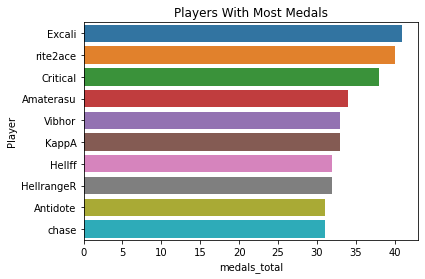

In [22]:
sns.barplot(data=players.sort_values(by='medals_total',ascending=False).head(10),x='medals_total',y='Player')
plt.title('Players With Most Medals')
plt.show()

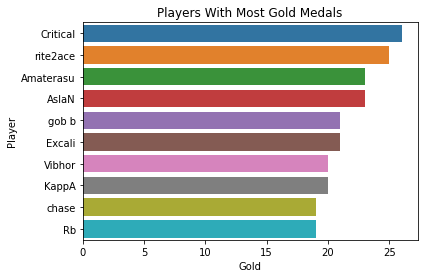

In [23]:
sns.barplot(data=players.sort_values(by='Gold',ascending=False).head(10),x='Gold',y='Player')
plt.title('Players With Most Gold Medals')
plt.show()

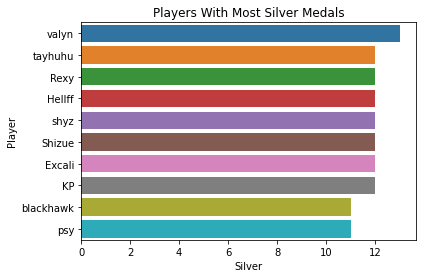

In [24]:
sns.barplot(data=players.sort_values(by='Silver',ascending=False).head(10),x='Silver',y='Player')
plt.title('Players With Most Silver Medals')
plt.show()

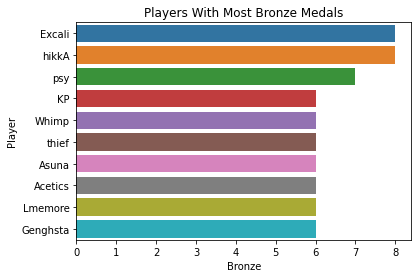

In [25]:
sns.barplot(data=players.sort_values(by='Bronze',ascending=False).head(10),x='Bronze',y='Player')
plt.title('Players With Most Bronze Medals')
plt.show()

#### 1. Excali es el jugador con más medallas totales y medallas de bronce
#### 2. Critical es el jugador con más medallas de oro
#### 3. Valyn es la jugadora con más medallas de plata

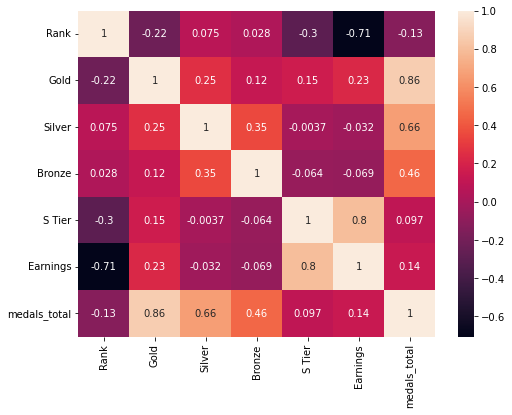

In [26]:
plt.figure(figsize=(8,6))
sns.heatmap(players.corr(),annot=True)
plt.show()

#### Las ganancias y el nivel S están fuertemente correlacionados (ganar un evento de nivel S genera más ganancias)
#### El rango está negativamente correlacionado con las ganancias (las ganancias disminuyen con el aumento en el rango)

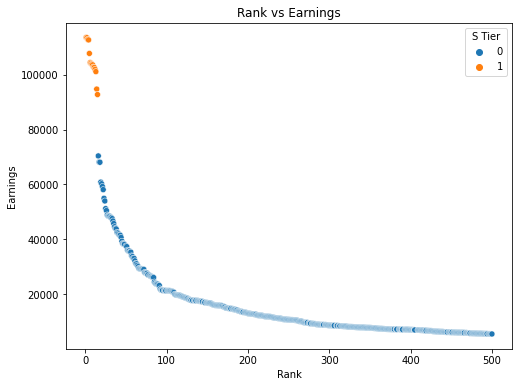

In [27]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=players,x='Rank', y='Earnings', hue='S Tier')
plt.title('Rank vs Earnings')
plt.show()

### Teams Data Visualization

In [28]:
teams['medals_total'] = teams['Gold'] + teams['Silver'] + teams['Bronze']

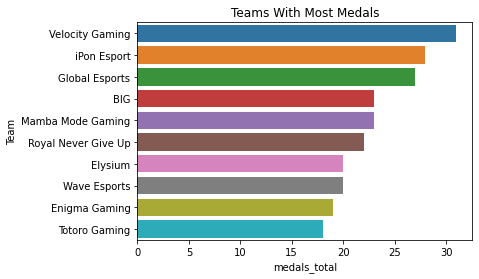

In [29]:
sns.barplot(data=teams.sort_values(by='medals_total',ascending=False).head(10),x='medals_total',y='Team')
plt.title('Teams With Most Medals')
plt.show()

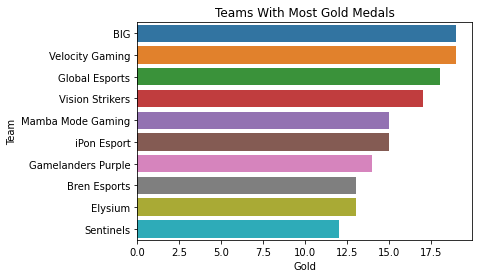

In [30]:
sns.barplot(data=teams.sort_values(by='Gold',ascending=False).head(10),x='Gold',y='Team')
plt.title('Teams With Most Gold Medals')
plt.show()

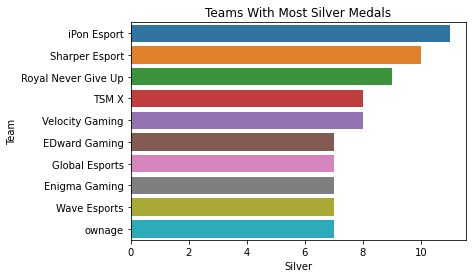

In [31]:
sns.barplot(data=teams.sort_values(by='Silver',ascending=False).head(10),x='Silver',y='Team')
plt.title('Teams With Most Silver Medals')
plt.show()

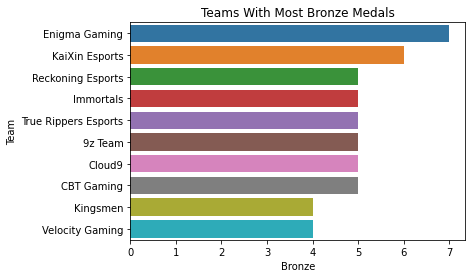

In [32]:
sns.barplot(data=teams.sort_values(by='Bronze',ascending=False).head(10),x='Bronze',y='Team')
plt.title('Teams With Most Bronze Medals')
plt.show()

#### El equipo de juego de Velocity ha ganado la mayor cantidad de medallas
#### El equipo GRANDE tiene la mayor cantidad de medallas de oro
#### iPon Esports tiene la mayor cantidad de medallas de plata
#### Enigma Gaming ha obtenido la mayor cantidad de medallas de plata

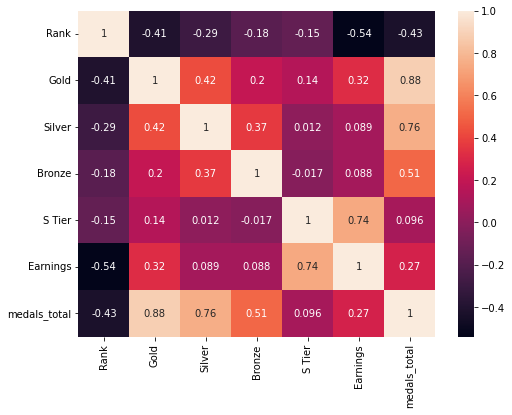

In [33]:
plt.figure(figsize=(8,6))
sns.heatmap(teams.corr(),annot=True)
plt.show()

#### Las ganancias y el nivel S están fuertemente correlacionados (ganar un evento de nivel S genera más ganancias)
#### El rango está negativamente correlacionado con las ganancias (las ganancias disminuyen con el aumento en el rango)

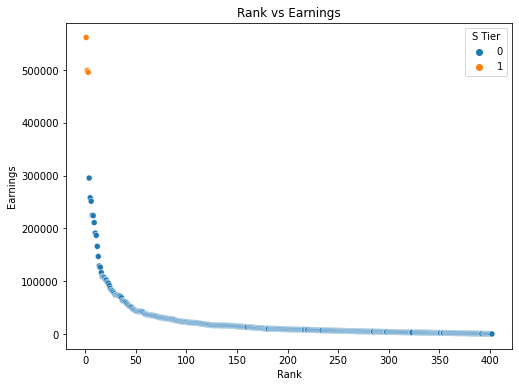

In [34]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=teams,x='Rank', y='Earnings', hue='S Tier')
plt.title('Rank vs Earnings')
plt.show()